# **Linear SVM**

## **Imports**

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

from sklearn.datasets import make_classification, make_blobs 
sns.set_theme(style='whitegrid')

## **Model**

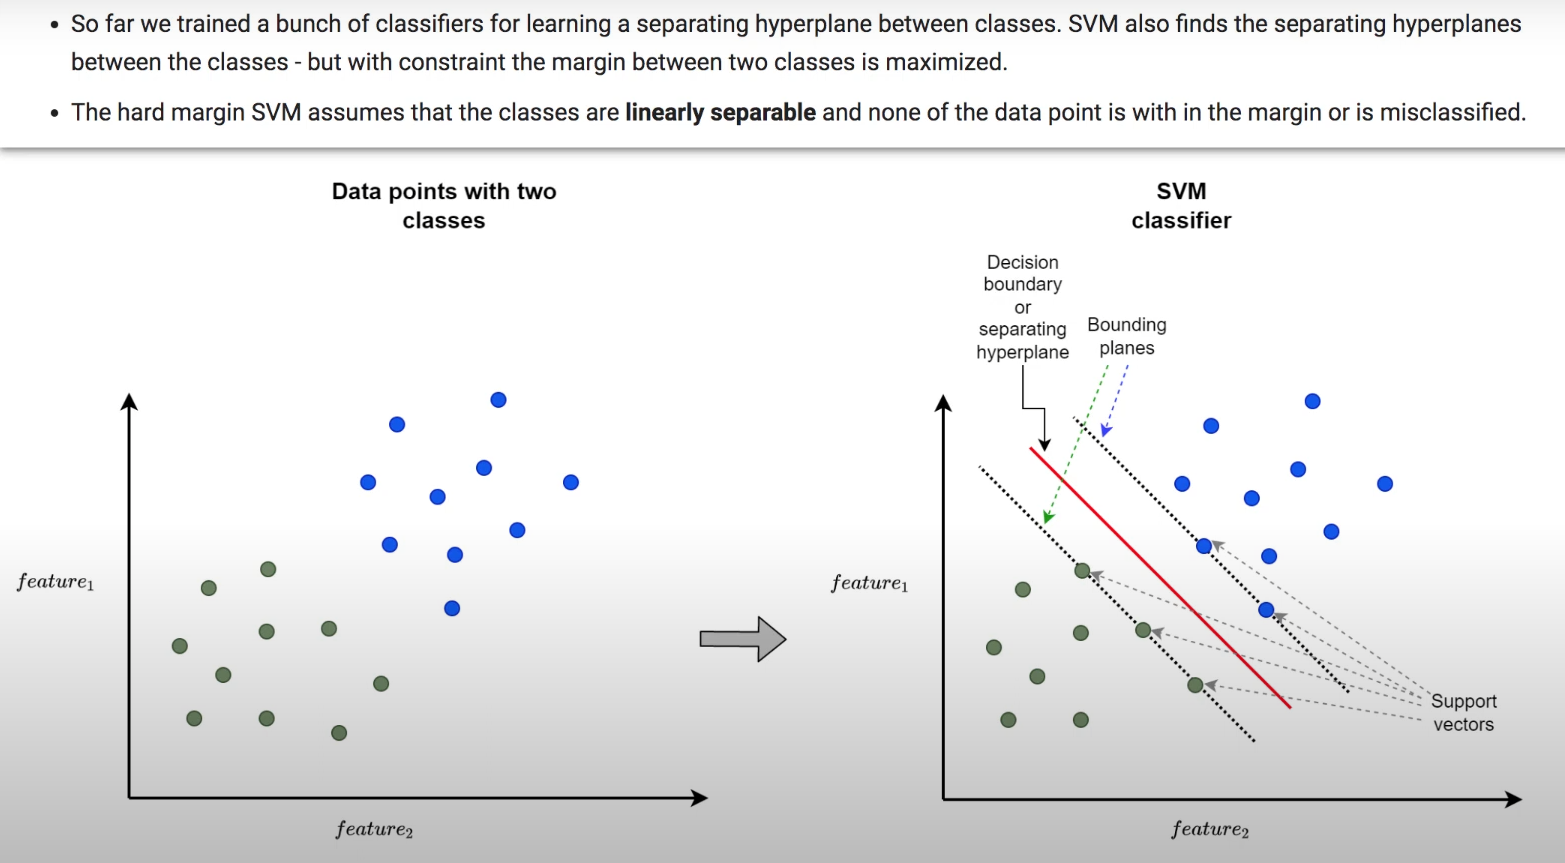

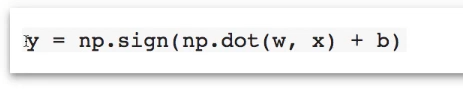

## **Loss Function**

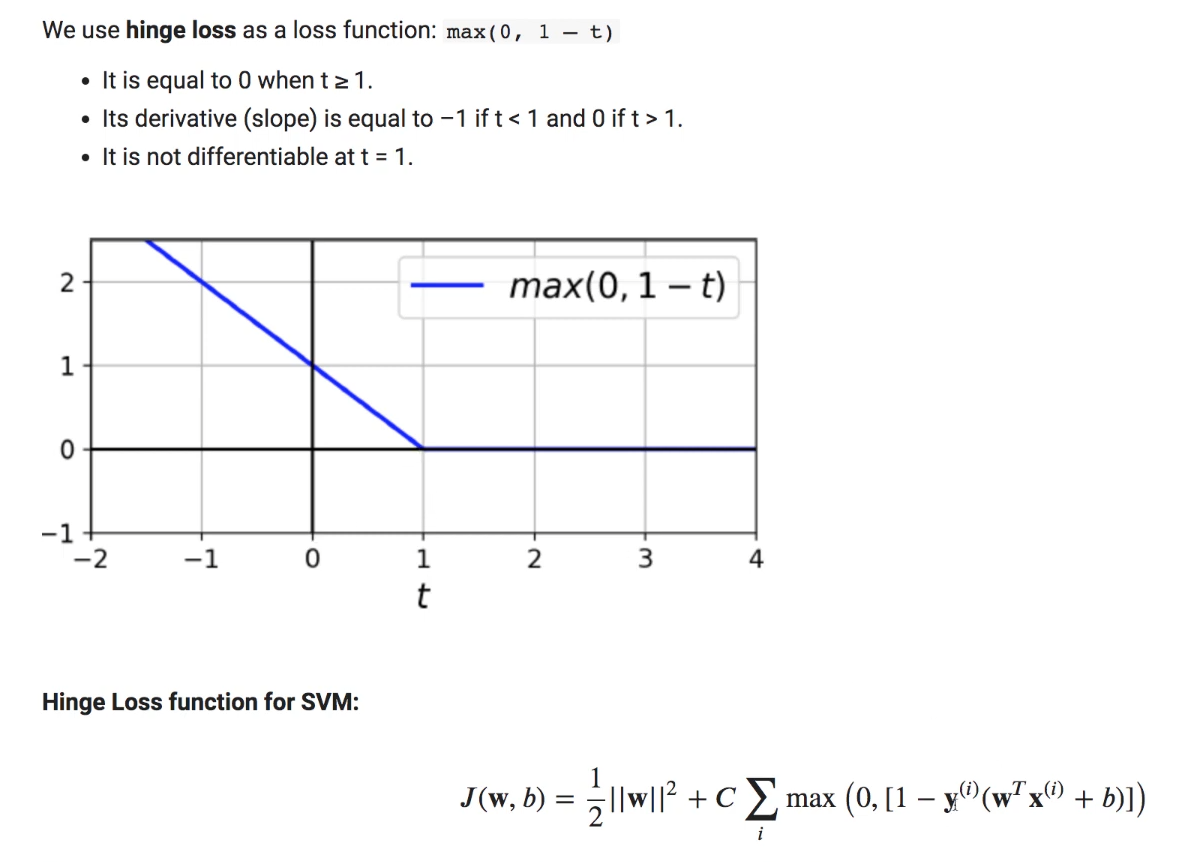
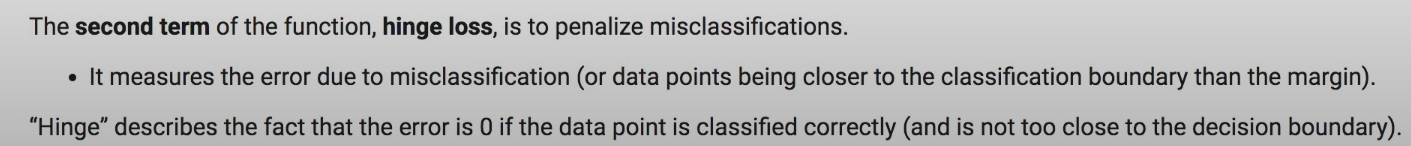
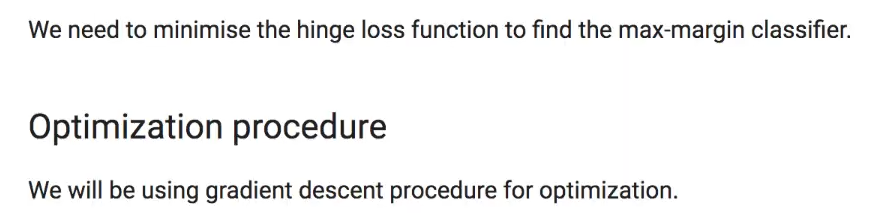

## **Soft SVM Implementation**

In [16]:
class softSVM:
  def __init__(self,C):
    self._support_vectors=None
    self.C=C
    self.w=None
    self.b=None
    self.x=None
    self.y=None

    # n is number of data points
    self.n=0
    # d id number of dimentions
    self.d=0

  def __decision_function(self,X):
    return X.dot(self.w)+self.b
  
  def __cost(self,margin):
    return (1/2)*self.w.dot(self.w)+self.C*np.sum(np.maximum(0,1-margin))
  
  def __margin(self,X,y):
    return y*self.__decision_function(X)
  
  def fit(self, X, y, lr=1e-3,epochs=500):
    # initialize w and b
    self.n,self.d=X.shape
    self.w=np.random.randn(self.d)
    self.b=0

    # required for plotting
    self.X=X
    self.y=y

    loss_array=[]
    for _ in range(epochs):
      margin=self.__margin(X,y)
      loss=self.__cost(margin)
      loss_array.append(loss)

      misclassified_pts_idx=np.where(margin<1)[0]
      d_w=self.w-self.C*y[misclassified_pts_idx].dot(X[misclassified_pts_idx])
      self.w=self.w-lr*d_w

      d_b=-self.C*np.sum(y[misclassified_pts_idx])
      self.b=self.b-lr*d_b
    self._support_vectors=np.where(self.__margin(X,y)<=1)[0]

  def predict(self,X):
    return np.sign(self.__decision_function(X))
  
  def score(self,X,y):
    P=self.predict(X)
    return np.mean(y==P)
  
  def plot_decision_boundary(self):
    plt.scatter(self.X[:,0],self.X[:,1],c=self.y, marker='o',
                s=100,cmap='autumn')
    ax=plt.gca()
    xlim=ax.get_xlim()
    ylim=ax.get_ylim()


    # create grid to evaluate model

    xx=np.linspace(xlim[0],xlim[1],30)
    yy=np.linspace(ylim[0],ylim[1],30)
    YY,XX=np.meshgrid(yy,xx)
    xy=np.vstack([XX.ravel(),YY.ravel()]).T
    z=self.__decision_function(xy).reshape(XX.shape)

    # plot decision boundary and margins
    ax.contour(XX,YY,z, colors=['g','k','g'],levels=[-1,0,1],
               linestyles=['--','-','--'],linewidths=[2.0,2.0,2.0])
    
    # highlight the support vector
    ax.scatter(self.X[:,0][self._support_vectors],
               self.X[:,1][self._support_vectors],
               s=250, linewidth=1,facecolor='none',edgecolor='k')
    
    plt.xlabel('$x_1$')
    plt.ylabel('$x_2$')
    plt.show()
  


## **Linearly Seperable Data**

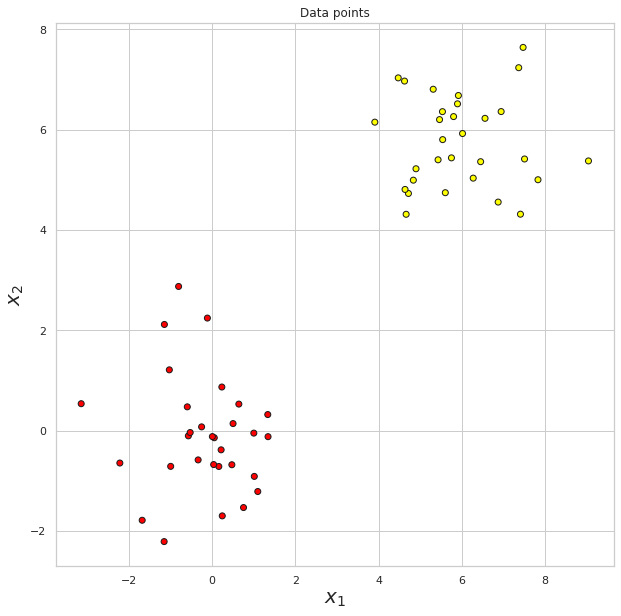

(60, 2) (60,)


In [46]:
X,Y=make_blobs(n_samples=60,
               n_features=2,
               centers=[[0,0],[6,6]],
               cluster_std=1,
               random_state=12)
Y=np.where(Y==0,-1,1)
plt.figure(figsize=(10,10)) 
plt.scatter(X[:,0],X[:,1], marker='o',c=Y,edgecolor='k',cmap='autumn')
plt.xlabel('$x_1$',fontsize=20)
plt.ylabel('$x_2$',fontsize=20)
plt.title('Data points')
plt.show()
print(X.shape,Y.shape)

[0.31897938 0.23976381]


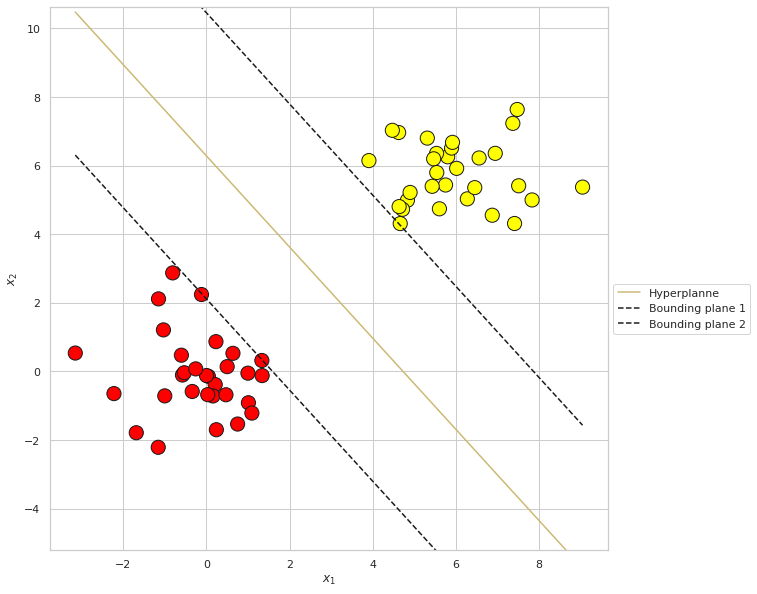

In [18]:
svm=softSVM(C=1)
svm.fit(X,Y)
print(svm.w)

def get_hyperplane_value(x,w,b,offset)  :
  return -1*(w[0] * x + b + offset)/w[1]

fig=plt.figure(figsize=(10,10))
ax=fig.add_subplot(1,1,1)
plt.scatter(X[:,0],X[:,1], marker='o',c=Y, s=200,edgecolor='k',cmap='autumn')
x0_1=np.amin(X[:,0])
x0_2=np.amax(X[:,0])

x1_1=get_hyperplane_value(x0_1,svm.w,svm.b,0)
x1_2=get_hyperplane_value(x0_2,svm.w,svm.b,0)

x1_1_m=get_hyperplane_value(x0_1,svm.w,svm.b,-1)
x1_2_m=get_hyperplane_value(x0_2,svm.w,svm.b,-1)

x1_1_p=get_hyperplane_value(x0_1,svm.w,svm.b,1)
x1_2_p=get_hyperplane_value(x0_2,svm.w,svm.b,1)

ax.plot([x0_1,x0_2],[x1_1,x1_2],'y')
ax.plot([x0_1,x0_2],[x1_1_m,x1_2_m],'k--')
ax.plot([x0_1,x0_2],[x1_1_p,x1_2_p],'k--')

x1_min=np.amin(X[:,1])
x1_max=np.amax(X[:,1])

ax.set_ylim([x1_min-3,x1_max+3])
ax.legend(['Hyperplanne','Bounding plane 1','Bounding plane 2'],bbox_to_anchor=(1,0.5))
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.show()

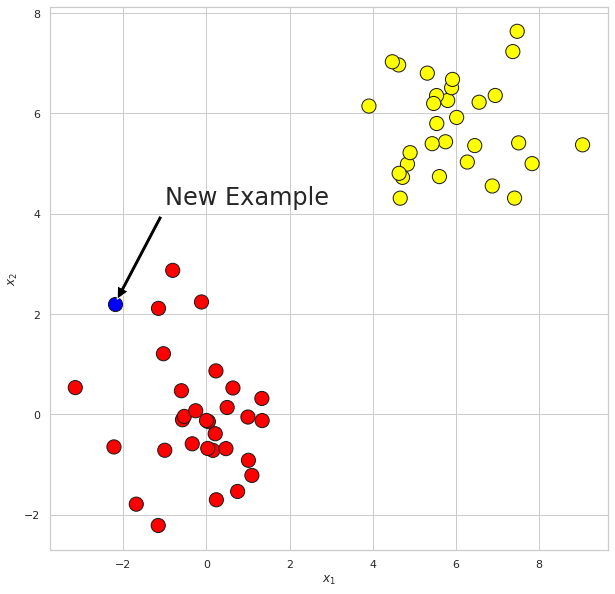

In [19]:
newExample=np.array([-2.2,2.2]) 
plt.figure(figsize=(10,10))
plt.scatter(X[:,0],X[:,1], marker='o',c=Y, s=200,edgecolor='k',cmap='autumn')

plt.scatter(newExample[0],newExample[1], marker='o',c='blue', s=200,
            edgecolor='k',cmap='autumn')

plt.annotate('New Example',xy=newExample,xytext=(50,100),
             textcoords='offset points',arrowprops=dict(facecolor='black',
                                                        shrink=0.05),
             fontsize=24)
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.show()

In [20]:
svm.predict(newExample)

-1.0

## **Linearly seperable with noise**

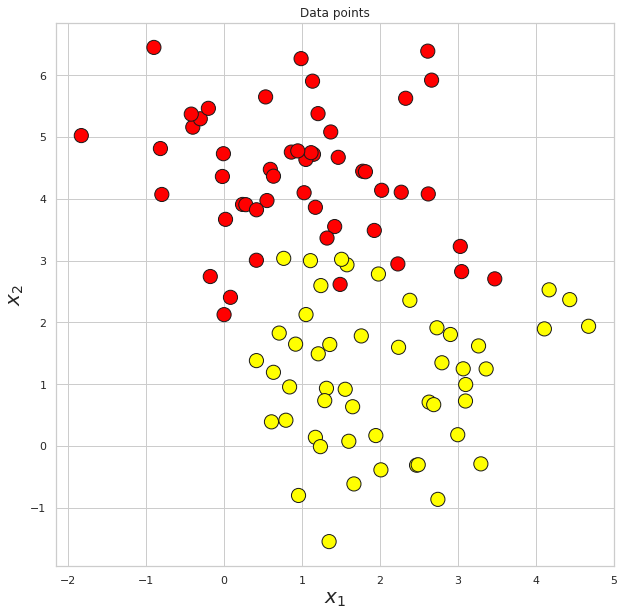

In [21]:
X,y=make_blobs(n_samples=100, 
               centers=2,
               cluster_std=1.1,
               random_state=0)
plt.figure(figsize=(10,10)) 
plt.scatter(X[:,0],X[:,1], marker='o',c=y,s=200,edgecolor='k',cmap='autumn')
plt.xlabel('$x_1$',fontsize=20)
plt.ylabel('$x_2$',fontsize=20)
plt.title('Data points')
plt.show()

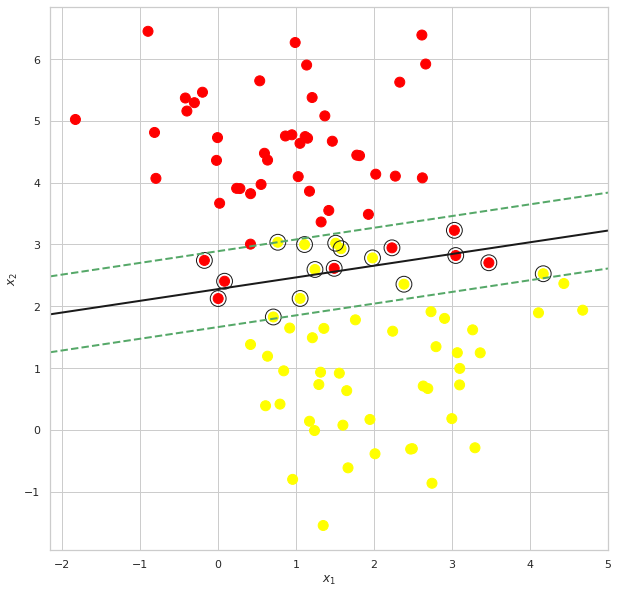

[ 0.30843445 -1.628766  ] 3.7100000000000084


In [22]:
y[y==0]=-1
svm=softSVM(C=10)
svm.fit(X,y)
fig=plt.figure(figsize=(10,10))
svm.plot_decision_boundary()
print(svm.w, svm.b)

## **Linearly non-seperable dataset**

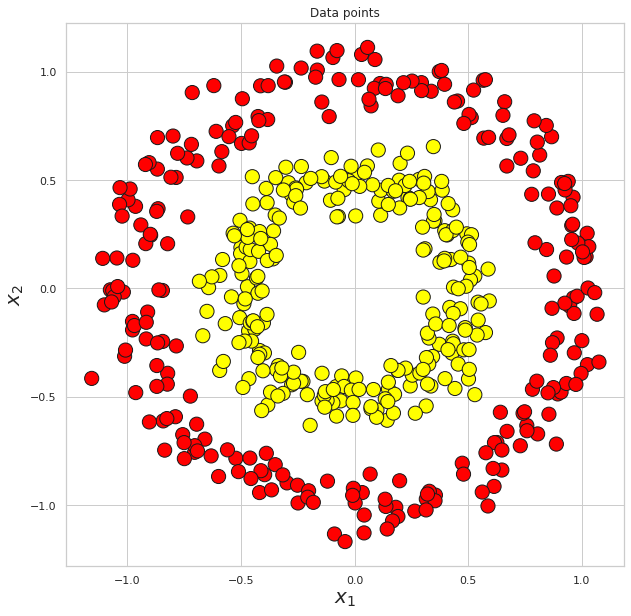

In [23]:
from sklearn.datasets import make_circles
X,y=make_circles(500,factor=0.5,noise=0.08)
y[y==0]=-1

plt.figure(figsize=(10,10))
plt.scatter(X[:,0],X[:,1], marker='o',c=y,s=200,edgecolor='k',cmap='autumn')
plt.xlabel('$x_1$',fontsize=20)
plt.ylabel('$x_2$',fontsize=20)
plt.title('Data points')
plt.show()

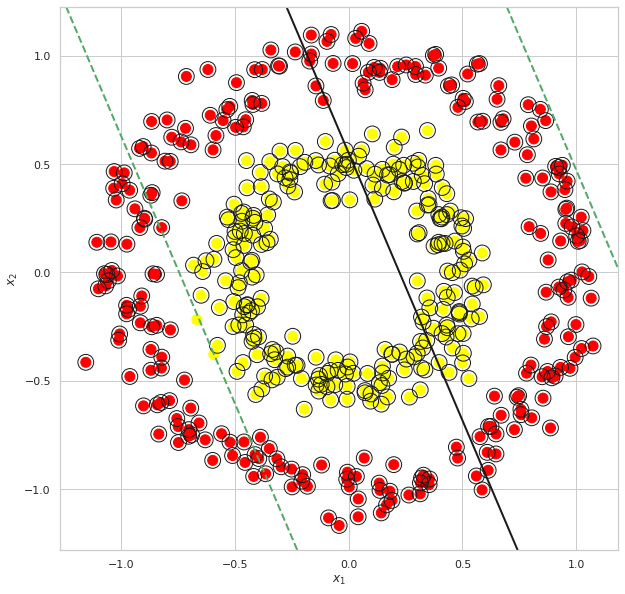

[-1.0317084  -0.41840563] 0.22999999999999982


In [24]:
y[y==0]=-1
svm=softSVM(C=10)
svm.fit(X,y)
fig=plt.figure(figsize=(10,10))
svm.plot_decision_boundary()
print(svm.w, svm.b)

# **Kernel SVM**

In [11]:
class SVMDualProblem:
  def __init__(self,C=1.0,kernel='rbf',sigma=0.1,degree=2):
    
    self.C=C
    if kernel=='poly':
      self.kernel=self._polynomial_kernel
      self.c=1
      self.degree=degree
    else:
      self.kernel=self._rbf_kernel
      self.sigma=sigma

    
    self.X=None
    self.y=None
    self.alpha=None
    self.b=None
    self.ones=None

  def _rbf_kernel(self,X1,X2):
    return np.exp(-(1/self.sigma**2)*np.linalg.norm(
        X1[:,np.newaxis]-X2[np.newaxis,:], axis=2
    )**2)
  
  def _polynomial_kernel(self,X1,X2):
    return (self.c+X1.dot(X2.T))**self.degree
  
  
  def fit(self, X, y, lr=1e-3,epochs=100):
    # initialize w and b
    self.X=X
    self.y=y

    self.alpha=np.random.random(X.shape[0])

    self.b=0
    self.ones=np.ones(X.shape[0])
    y_iy_jk__ij=np.outer(y,y)*self.kernel(X,X)

    losses=[]

    for _ in range(epochs):
      gradient=self.ones-y_iy_jk__ij.dot(self.alpha)
      self.alpha=self.alpha+lr*gradient
      self.alpha[self.alpha>self.C]=self.C

      self.alpha[self.alpha<0]=0

      loss=np.sum(self.alpha)-0.5*np.sum(
          np.outer(self.alpha, self.alpha)*y_iy_jk__ij
      )
      losses.append(loss)
    index=np.where((self.alpha)>0 & (self.alpha<self.C))[0]
    # (m,)=(m,)(n,).(n,m)=(m,)
    b_i=y[index]-(self.alpha*y).dot(self.kernel(X,X[index]))
    self.b=np.mean(b_i)

    plt.plot(losses)
    plt.title('loss per epoch')
    plt.show()

  def _decision_function(self,X):
    return (self.alpha*self.y).dot(self.kernel(self.X,X))+self.b

  def predict(self,X):
    return np.sign(self._decision_function(X))
  
  def score(self,X,y):
    y_hat=self.predict(X)
    return np.mean(y==y_hat)
  
  def plot_decision_boundary(self):
    plt.scatter(self.X[:,0],self.X[:,1],c=self.y,alpha=0.5,
                s=50,cmap=plt.cm.Paired)
    ax=plt.gca()
    xlim=ax.get_xlim()
    ylim=ax.get_ylim()


    # create grid to evaluate model

    xx=np.linspace(xlim[0],xlim[1],30)
    yy=np.linspace(ylim[0],ylim[1],30)
    YY,XX=np.meshgrid(yy,xx)
    xy=np.vstack([XX.ravel(),YY.ravel()]).T
    z=self._decision_function(xy).reshape(XX.shape)

    # plot decision boundary and margins
    ax.contour(XX,YY,z, colors=['b','g','r'],levels=[-1,0,1], alpha=0.5,
               linestyles=['--','-','--'],linewidths=[2.0,2.0,2.0])
    
    # highlight the support vector
    ax.scatter(self.X[:,0][self.alpha>0.],
               self.X[:,1][self.alpha>0.],
               s=50, linewidth=1,facecolor='none',edgecolor='k')
    
    plt.xlabel('$x_1$')
    plt.ylabel('$x_2$')
    plt.show()
  


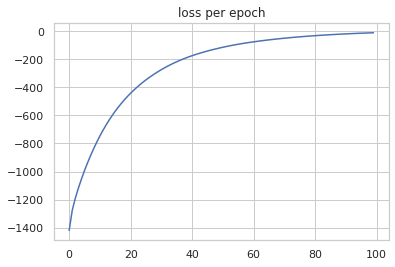

0.998


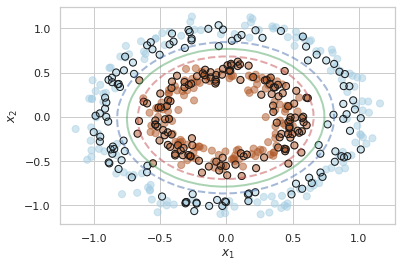

In [12]:
svm=SVMDualProblem(C=1.0,kernel='poly',degree=2)
svm.fit(X,y, lr=1e-3)
print(svm.score(X,y))
svm.plot_decision_boundary()

# **Graded Assignment**

In [47]:
# svm=softSVM(C=1)
X=np.array([[2,1],[2,-1],[0,2],[4,0],[5,1],[6,2],[-1,0],[5,-1]])
y=np.array([-1,-1,-1,1,1,1,-1,1])
print(X.shape, y.shape)


(8, 2) (8,)


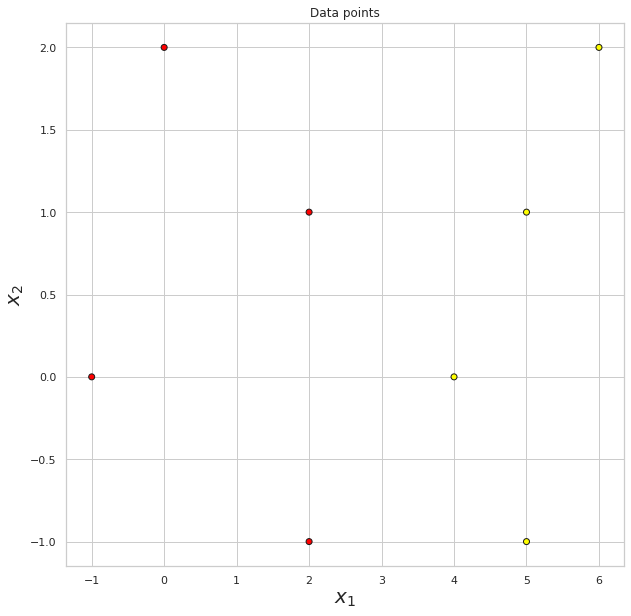

In [48]:

plt.figure(figsize=(10,10)) 
plt.scatter(X[:,0],X[:,1], marker='o',c=y,edgecolor='k',cmap='autumn')
plt.xlabel('$x_1$',fontsize=20)
plt.ylabel('$x_2$',fontsize=20)
plt.title('Data points')
plt.show()

In [68]:
svm=softSVM(C=8)
svm.fit(X,y)
print(svm.w)

[1.03971158 0.0016454 ]


In [69]:
print(svm.b)

-3.1280000000000023


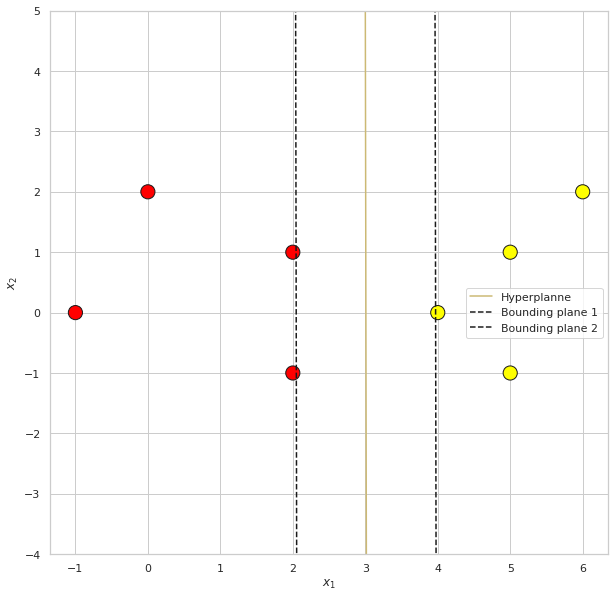

In [70]:
def get_hyperplane_value(x,w,b,offset)  :
  return -1*(w[0] * x + b + offset)/w[1]

fig=plt.figure(figsize=(10,10))
ax=fig.add_subplot(1,1,1)
plt.scatter(X[:,0],X[:,1], marker='o',c=y, s=200,edgecolor='k',cmap='autumn')
x0_1=np.amin(X[:,0])
x0_2=np.amax(X[:,0])

x1_1=get_hyperplane_value(x0_1,svm.w,svm.b,0)
x1_2=get_hyperplane_value(x0_2,svm.w,svm.b,0)

x1_1_m=get_hyperplane_value(x0_1,svm.w,svm.b,-1)
x1_2_m=get_hyperplane_value(x0_2,svm.w,svm.b,-1)

x1_1_p=get_hyperplane_value(x0_1,svm.w,svm.b,1)
x1_2_p=get_hyperplane_value(x0_2,svm.w,svm.b,1)

ax.plot([x0_1,x0_2],[x1_1,x1_2],'y')
ax.plot([x0_1,x0_2],[x1_1_m,x1_2_m],'k--')
ax.plot([x0_1,x0_2],[x1_1_p,x1_2_p],'k--')

x1_min=np.amin(X[:,1])
x1_max=np.amax(X[:,1])

ax.set_ylim([x1_min-3,x1_max+3])
ax.legend(['Hyperplanne','Bounding plane 1','Bounding plane 2'],bbox_to_anchor=(1,0.5))
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.show()

In [76]:
x1,x2=-2,-2
print(4-x2+np.abs(x1-x2), 4-x1+np.abs(x1-x2))

6 6


In [77]:
X=np.array([[2,2],[10,6],[6,10],[6,6],[5,1],[6,2],[-1,0],[5,-1]])
y=np.array([1,1,1,1,-1,-1,-1,-1])
print(X.shape, y.shape)

(8, 2) (8,)


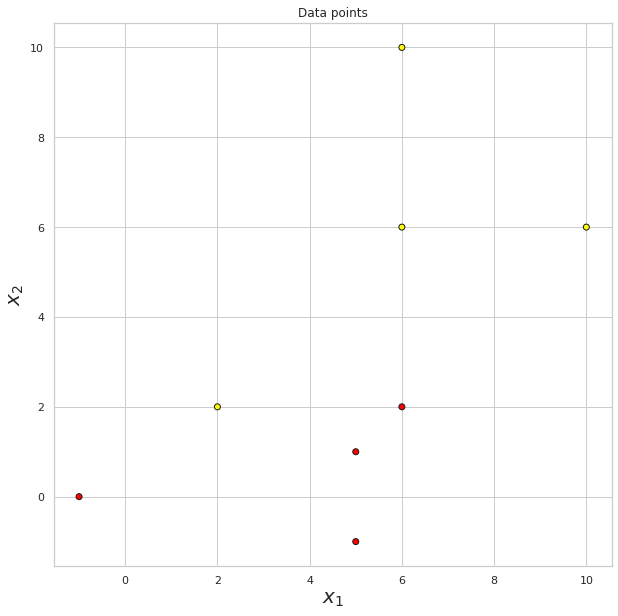

In [79]:
plt.figure(figsize=(10,10)) 
plt.scatter(X[:,0],X[:,1], marker='o',c=y,edgecolor='k',cmap='autumn')
plt.xlabel('$x_1$',fontsize=20)
plt.ylabel('$x_2$',fontsize=20)
plt.title('Data points')
plt.show()

[-0.49538464  1.77314401]
-1.5149999999999972


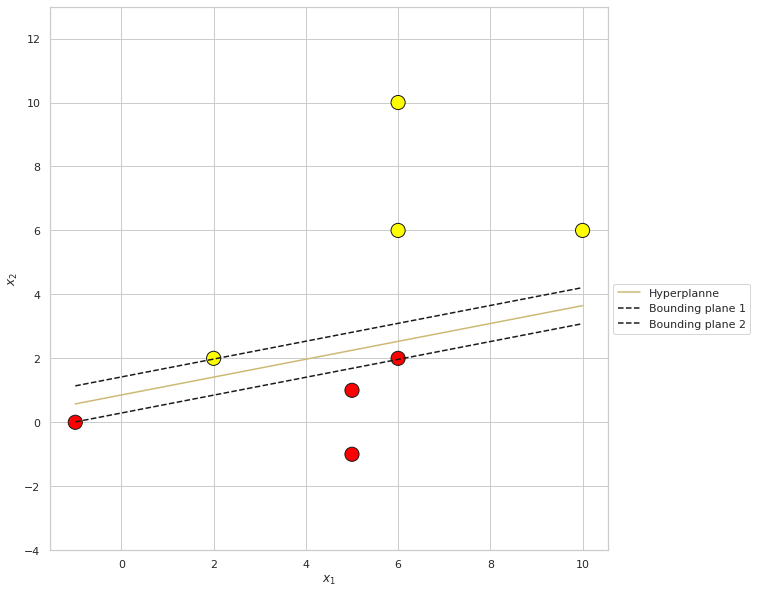

In [94]:
svm=softSVM(C=5)
svm.fit(X,y)
print(svm.w)
print(svm.b)

def get_hyperplane_value(x,w,b,offset)  :
  return -1*(w[0] * x + b + offset)/w[1]

fig=plt.figure(figsize=(10,10))
ax=fig.add_subplot(1,1,1)
plt.scatter(X[:,0],X[:,1], marker='o',c=y, s=200,edgecolor='k',cmap='autumn')
x0_1=np.amin(X[:,0])
x0_2=np.amax(X[:,0])

x1_1=get_hyperplane_value(x0_1,svm.w,svm.b,0)
x1_2=get_hyperplane_value(x0_2,svm.w,svm.b,0)

x1_1_m=get_hyperplane_value(x0_1,svm.w,svm.b,-1)
x1_2_m=get_hyperplane_value(x0_2,svm.w,svm.b,-1)

x1_1_p=get_hyperplane_value(x0_1,svm.w,svm.b,1)
x1_2_p=get_hyperplane_value(x0_2,svm.w,svm.b,1)

ax.plot([x0_1,x0_2],[x1_1,x1_2],'y')
ax.plot([x0_1,x0_2],[x1_1_m,x1_2_m],'k--')
ax.plot([x0_1,x0_2],[x1_1_p,x1_2_p],'k--')

x1_min=np.amin(X[:,1])
x1_max=np.amax(X[:,1])

ax.set_ylim([x1_min-3,x1_max+3])
ax.legend(['Hyperplanne','Bounding plane 1','Bounding plane 2'],bbox_to_anchor=(1,0.5))
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.show()

ValueError: ignored